# Vamos a performance de uma carteira de ativos.

- Análisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### DATA FRAME DE COTAÇÕES DO ATIVOS DA CARTEIRA

In [79]:
carteira_x = pd.DataFrame()
carteira_x3 = carteira_x 

for ativo in carteira['Ativos']:
    carteira_x[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']
    
display(carteira_x)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,32.214535,35.841537,10.9650,19.055841,18.437340,70.915009,38.330002,126.190002,149.000000,199.600006,NaN
2020-01-03,113.800003,140.899994,11.922436,32.229362,35.464550,11.0675,19.561920,18.490847,72.241066,41.000000,127.699997,147.000000,199.600006,NaN
2020-01-06,112.589996,139.100006,11.932190,31.653683,34.936783,11.3500,19.634151,18.464094,69.262360,40.130001,126.699997,148.559998,197.979996,NaN
2020-01-07,112.239998,139.399994,11.898049,31.103781,34.126270,11.2650,19.594959,18.537760,66.897209,40.779999,126.870003,143.830002,198.750000,NaN
2020-01-08,111.949997,138.199997,12.263844,30.622618,33.570225,11.2125,19.692936,18.373470,67.293045,40.990002,124.570000,139.470001,187.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,17.952339,24.097115,14.4000,18.164530,18.547529,71.288712,47.669998,107.500000,126.970001,158.380005,127.660004
2020-11-05,96.949997,115.900002,27.401571,18.230133,24.665810,14.6775,19.222658,19.367037,72.212219,50.279999,107.500000,128.380005,158.179993,127.959999
2020-11-06,97.190002,117.510002,27.281780,18.186726,24.636894,14.7925,19.820301,19.579319,73.344261,50.630001,107.349998,128.029999,158.440002,130.000000


### Será que todos os ativos vieram corretos? Ajustando caso não.

In [24]:
#Preencher com o último valor usando .ffill(axis=1 or 0)
carteira_x2 = carteira_x.ffill(axis=1)
carteira_x2.info()

#Outra maneira
#df_media = carteira_x.mean()
#carteira_x.fillna(df_media)
#carteira_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   214 non-null    float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  214 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


### Vamos ver como que as ações foram individualmente

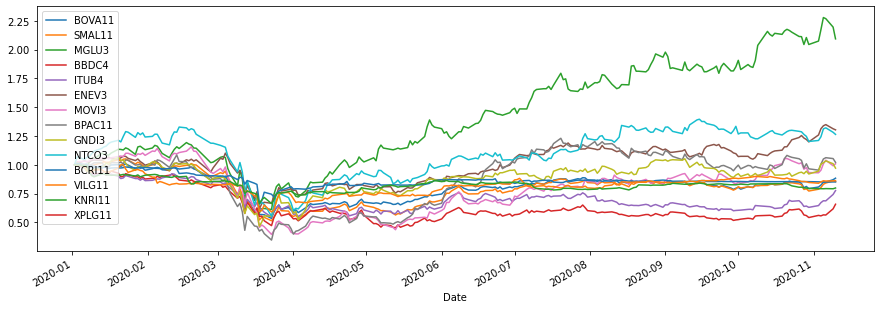

In [76]:
carteira_x_graf = carteira_x / carteira_x.iloc[0]
carteira_x_graf.plot(figsize=(15,5)).legend(loc='upper left')

### Vamos puxar o IBOV para comparar

In [54]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2020-11-10')[['Adj Close']]
display(cotacao_ibov)

,Adj Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2020-11-04,97811.0
2020-11-05,100774.0
2020-11-06,100799.0


### Criando um DATAFRAME da carteira com as quantiades de ações

In [107]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = carteira_x3[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0] 
#valor_investido.plot(figsize=(15,5))
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,3221.453476,3584.153748,3289.500046,1905.584145,1843.733978,7091.500854,3833.000183,12619.000244,14900.000000,19960.000610,NaN
2020-01-03,11380.000305,14089.999390,11922.435760,3222.936249,3546.455002,3320.250034,1956.192017,1849.084663,7224.106598,4100.000000,12769.999695,14700.000000,19960.000610,NaN
2020-01-06,11258.999634,13910.000610,11932.189941,3165.368271,3493.678284,3405.000114,1963.415146,1846.409416,6926.235962,4013.000107,12669.999695,14855.999756,19797.999573,NaN
2020-01-07,11223.999786,13939.999390,11898.049355,3110.378075,3412.627029,3379.500103,1959.495926,1853.775978,6689.720917,4077.999878,12687.000275,14383.000183,19875.000000,NaN
2020-01-08,11194.999695,13819.999695,12263.843536,3062.261772,3357.022476,3363.749886,1969.293594,1837.347031,6729.304504,4099.000168,12456.999969,13947.000122,18750.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1795.233917,2409.711456,4319.999886,1816.452980,1854.752922,7128.871155,4766.999817,10750.000000,12697.000122,15838.000488,12766.000366
2020-11-05,9694.999695,11590.000153,27401.571274,1823.013306,2466.580963,4403.249931,1922.265816,1936.703682,7221.221924,5027.999878,10750.000000,12838.000488,15817.999268,12795.999908
2020-11-06,9719.000244,11751.000214,27281.780243,1818.672562,2463.689423,4437.749863,1982.030106,1957.931900,7334.426117,5063.000107,10734.999847,12802.999878,15844.000244,13000.000000


# Comparação Carteira IBOV

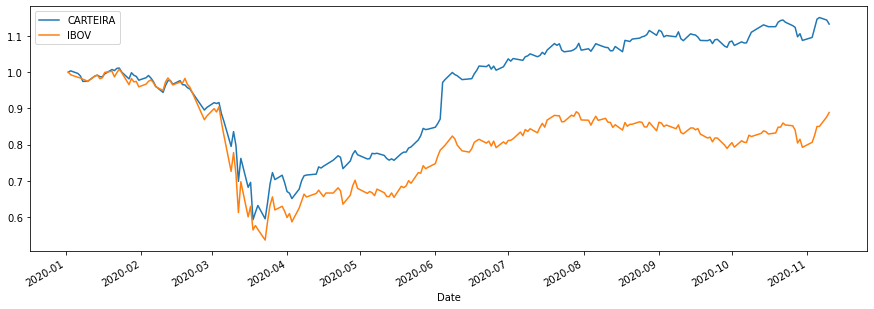

In [108]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5), label='CARTEIRA')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [109]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] -1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] -1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: 13.27%
Retorno IBOV: -11.15%


# Calculando Correlação

In [111]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.7270532062068895
